<h1>Importations</h1>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<h1>Exercice 1 :</h1>
L'objectif de cet exercice est de réaliser un programme affichant des lignes iso-valeurs d’un
champ de scalaires 2D, ainsi que des surfaces correspondantes, comme vu en cours . Ce
champ est supposé être disponible dans un fichier, et lors de son exploitation, il est chargé
dans des tableaux x [i] [j] et y [i] [j] pour les coordonnées et s[i] [j ] pour les valeurs scalaires
en chacun de ces points.
Votre programme doit avoir une fonction void charger(char *nom) qui va lire une série de
valeurs dans le fichier désigné par la chaîne nom, et les range dans les tableaux adéquats, puis
afficher une image du même type que celle qui suit .

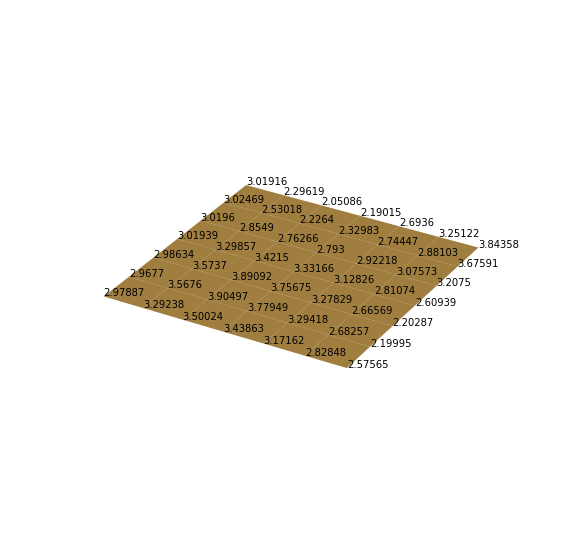

In [3]:
def charger(filename="coordonnees.txt"):
    contenu = open(filename, "r")
    lignes_contenu = contenu.readlines()

    splittedLines = []

    i = int(lignes_contenu[0].split()[0])
    j = int(lignes_contenu[0].split()[1])
    shape = [i,j]
    coordonnees = lignes_contenu[1:]

    for line in coordonnees:

        line = line.rstrip("\n")
        splittedLines.append(line)

    
    x = np.zeros(shape)
    y = np.zeros(shape)
    s = np.zeros(shape)

    for splittedLine in splittedLines:
        x_index = int(splittedLine.split()[0])
        y_index = int(splittedLine.split()[1])
        s[x_index][y_index] = splittedLine.split()[2]

    for a in range(shape[0]):
        for b in range(shape[1]):
            x[a][b] = b
            y[a][b] = a
    return x, y, s 
           
x, y, s = charger()
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

X = np.arange(-1, 8, 0.5)
Y = np.arange(-1, 8, 0.5)
X, Y = np.meshgrid(X, Y)
Z = np.zeros([7,7])

surf = ax.plot_surface(x, y, Z, alpha=0.75, color='orange')

for i in range(7):
    for j in range(7):
        ax.text(x[i][j], y[i][j], 0, (s[i][j]))
        

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax._axis3don = False

plt.show()


<h1>Exercice 2 :</h1>
L’algorithme dit du « Marching Square » traite chaque cellule d’un maillage (ou une grille)
indépendamment les uns des autres. Le carré est situé dans le coin (0,0) de la grille, puis il va
avancer d'une cellule à la fois toujours dans la direction des X; Quand Xmax est atteint, X est
réinitialisé à 0, Y est incrémenté et l’on recommence. Le processus s'arrête quand l'intégralité
de la grille a été parcourue. Les cellules sont donc examinées l'une après l'autre, une cellule
contient un tronçon du contour ou alors elle est vide. Pour trouver les cellules non-vides, il
faut chercher celles qui ont des bords qui sont à cheval sur la valeur de référence. On peut
caractériser chaque cellule en examinant chacun de ses sommets et en testant si les valeurs
scalaires correspondantes sont supérieures (+) ou inférieures (-) à la valeur de référence. .Sur
la figure ci-dessus, la valeur de référence est 5.

On vous donne les 16 cas de figures qui peuvent se présenter. Vous remarquerez que certains
cas peuvent êtres déduits les uns des autres par, par exemple, la permutation des sommets de
la cellule traitée. Donner les 4 cas auxquels on peut ainsi se ramener en montrant comment
chacun des 16 cas initiaux se ramène à l’un de ceux-ci.

-------------------------

Nous n'avons pas suivi les cas vu en cours pour cet exercice afin de simplifier le code, nous avons donc non pas 4 mais 8 cas.<br>
les 4 cas des diagonales, les cas vertical et horizontal, et enfin les 2 cas avec 2 diagonales opposées.<br>

On traite ces cas grâce aux 6 tracés suivant:<br>

<strong>def casHorizontal(xa, ya, xb, yb, xc, yc, xd, yd)</strong><br><br>

<strong>def casVertical(xa, ya, xb, yb, xc, yc, xd, yd)</strong><br><br>

<strong>def casDiagonalBasGauche(xa, ya, xb, yb, xc, yc, xd, yd)</strong><br><br>

<strong>def casDiagonalBasDroit(xa, ya, xb, yb, xc, yc, xd, yd)</strong><br><br>

<strong>def casDiagonalHautGauche(xa, ya, xb, yb, xc, yc, xd, yd)</strong><br><br>

<strong>def casDiagonalHautDroit(xa, ya, xb, yb, xc, yc, xd, yd)</strong><br><br>

les cas diagonales, vertical, horizontal appellent chaqu'un la fonction qui correspond afin de récupérer la coordonées des point en vu de tracer l'isoligne. Pour le cas des diagonales parallèles, il faudra appeller 2 fois un tracé diagonal.

<h1>Exercice 3 :</h1>
Avec v comme iso- valeur, le (x, y) les coordonnées du point ayant pour valeur scalaire s, et a,
b, c, d les quatre sommets de la cellule carrée, écrire pour chaque cas de base une fonction
traçant la partie de l’iso ligne dans chaque cellule.<br>
Cas1(v, xa,ya, sa, xb, yb, sb, xc, yc, sc, sd, yd, sd) ;<br>
Cas2(v, xa,ya, sa, xb, yb, sb, xc, yc, sc, sd, yd, sd) ;<br>
Cas3(v, xa,ya, sa, xb, yb, sb, xc, yc, sc, sd, yd, sd) ;<br>
Cas4(v, xa,ya, sa, xb, yb, sb, xc, yc, sc, sd, yd, sd) ;

In [4]:
def marchingSquare(x, y, value=3):

    line = []

    xa = x[i][j]
    ya = y[i][j]
    sa = s[i][j]

    xb = x[i][j + 1]
    yb = y[i][j + 1]
    sb = s[i][j + 1]

    xc = x[i + 1][j + 1]
    yc = y[i + 1][j + 1]
    sc = s[i + 1][j + 1]

    xd = x[i + 1][j]
    yd = y[i + 1][j]
    sd = s[i + 1][j]

    cas = trouverCas(sa, sb, sc, sd, value)
    #print(cas)
            
    if(cas == "a" or cas == "bcd"):
        line.append(casDiagonalBasGauche(xa, ya, xb, yb, xc, yc, xd, yd))

    elif(cas == "b" or cas == "acd"):
        line.append(casDiagonalBasDroit(xa, ya, xb, yb, xc, yc, xd, yd))

    elif(cas == "c" or cas == "abd"):
        line.append(casDiagonalHautDroit(xa, ya, xb, yb, xc, yc, xd, yd))

    elif(cas == "d" or cas == "abc"):
        line.append(casDiagonalHautGauche(xa, ya, xb, yb, xc, yc, xd, yd))

    elif(cas == "bc" or cas == "ad"):
        line.append(casVertical(xa, ya, xb, yb, xc, yc, xd, yd))

    elif(cas == "ab" or cas == "cd"):
        line.append(casHorizontal(xa, ya, xb, yb, xc, yc, xd, yd))

    elif(cas == "bd"):
        line.append(casDiagonalBasDroit(xa, ya, xb, yb, xc, yc, xd, yd))
        line.append(casDiagonalHautGauche(xa, ya, xb, yb, xc, yc, xd, yd))
        
    elif(cas == "ac"):
        line.append(casDiagonalHautDroit(xa, ya, xb, yb, xc, yc, xd, yd))
        line.append(casDiagonalBasGauche(xa, ya, xb, yb, xc, yc, xd, yd))
                            
    return line

    
def trouverCas(sa, sb, sc, sd, value):
    cas = ""
    if(sa>=value):
        cas += "a"
    if(sb>=value):
        cas += "b"
    if(sc>=value):
        cas += "c"
    if(sd>=value):
        cas += "d"

    return cas

def casHorizontal(xa, ya, xb, yb, xc, yc, xd, yd):
    return (xa, (ya+yd)/2,xc, (yb+yc)/2)

def casVertical(xa, ya, xb, yb, xc, yc, xd, yd):
    return ((xa+xb)/2, ya,(xc+xd)/2, yc)

def casDiagonalBasGauche(xa, ya, xb, yb, xc, yc, xd, yd):
    return ((xa+xb)/2, yb, xd, (ya+yd)/2)

def casDiagonalBasDroit(xa, ya, xb, yb, xc, yc, xd, yd):
    return ((xa+xb)/2, ya, xc, (ya+yd)/2)

def casDiagonalHautGauche(xa, ya, xb, yb, xc, yc, xd, yd):
    return ((xc + xd) / 2, yc, xa, (ya + yd) / 2)

def casDiagonalHautDroit(xa, ya, xb, yb, xc, yc, xd, yd):
    return ((xc+xd)/2, yd, xb, (yb+yc)/2)




<h1>Exercice 4 :</h1>
Écrire un programme complet (C/OpenGl, Java ou C++/OpenGl) permettant de visualiser les
iso- lignes, ou lignes iso-valeurs correspondantes a une valeur v de champ scalaire donnée.

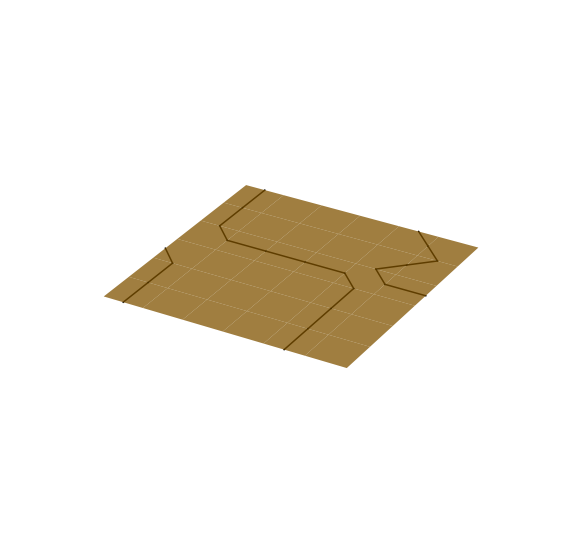

In [5]:
x,y,s = charger()
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

X = np.arange(-1, 8, 0.5)
Y = np.arange(-1, 8, 0.5)
X, Y = np.meshgrid(X, Y)
Z = np.zeros([7,7])

surf = ax.plot_surface(x, y, Z, alpha=0.75, color='orange')

for i in range(0,6):
    for j in range(0,6):
        isolignes = marchingSquare(x,y)
        if(isolignes):
            for isoligne in isolignes:
                ax.plot3D((isoligne[0],isoligne[2]),(isoligne[1],isoligne[3]),(0,0),color="black")
                
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax._axis3don = False

plt.show()

<h1>Exercice 5 :</h1>
Améliorez votre programme en affichant vos résultats en 2D1/2 ou en 3D, et en utilisant un
pavage de niveau de gris, un pavage de couleur

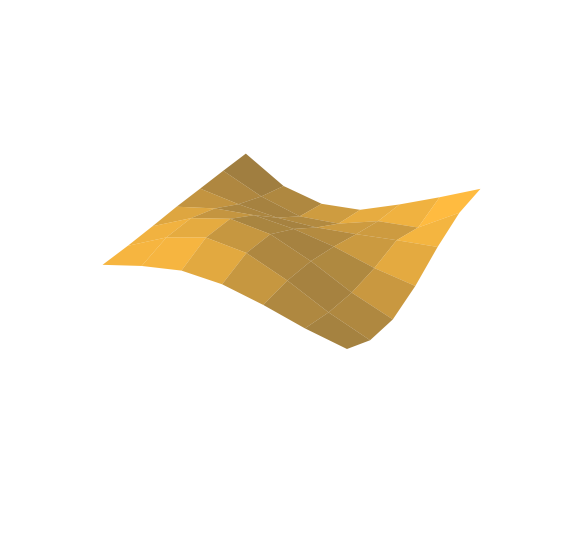

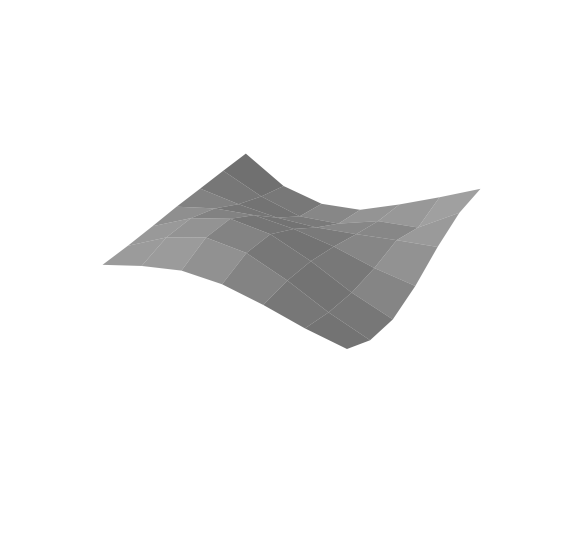

In [6]:
x,y,s = charger()

# Première figure en pavage de couleur 
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, s, alpha=0.75, color='orange')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_zlim(-2,6)
ax._axis3don = False

# Deuxième figure en pavage de gris

fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.gca(projection='3d')

surf_gray = ax2.plot_surface(x, y, s, alpha=0.75, color='gray')

ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.set_zlim(-2,6)
ax2._axis3don = False



plt.show()

